# Approach for a pair

by Reece Colclough and Oleg Glotov

In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress


### Stationarity and trend stationarity check

using ADF (Augmented Dickey–Fuller) and KPSS (Kwiatkowski–Phillips–Schmidt–Shin) respectively

In [2]:
def check_stationarity(series, alpha):

    # Set the warning filter to ignore warnings
    warnings.simplefilter(action='ignore', category=Warning)
    
    #h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series)
    p_val = result_adf[1]
    if p_val < alpha:
        #reject, likely stationary
        print("ADF test: p-val=",p_val,"-> Conclusion: likely stationary")
    else:
        # change: interpretation
        print("ADF test: p-val=",p_val,"-> Conclusion: likely non-stationary")
        
    print("----------------------------------------------------------------")

    # change: kpss test should be run on the input variable "series" not "diff"
    # change: conventionally, KPSS test is used to test for trend stationarity, I will use it to test for trend stationarity instead of stationarity
    result_kpss = kpss(series,regression='ct') 
    p_val = result_kpss[1]
    # change: interpretation change to reflect the change in the test
    if p_val > alpha:
        #reject, likely stationary
        print("KPSS test: p-val=",p_val,"-> Conclusion: likely trend stationary")
    else:
        print("KPSS test: p-val=",p_val,"-> Conclusion: likely not trend stationary")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


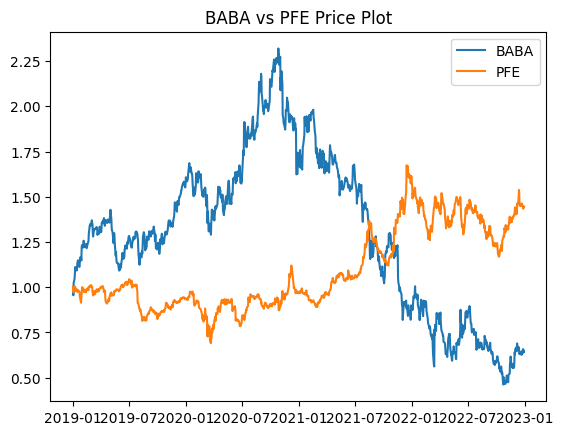

In [3]:
start_date = "2019-01-01"
end_date = "2023-01-01"

stk1 = "BABA"
stk2 = "PFE"

# change: variable names, we use the "most stationary" stock pairs from the previous analysis
stock1_data = yf.download(stk1,start=start_date,end=end_date)
stock2_data = yf.download(stk2,start=start_date,end=end_date)

# change: normalize the data so the price of the first observation is 1
stock1_data["Adj Close"] = stock1_data["Adj Close"]/stock1_data["Adj Close"].iloc[0]
stock2_data["Adj Close"] = stock2_data["Adj Close"]/stock2_data["Adj Close"].iloc[0]

plt.plot(stock1_data["Adj Close"],label=stk1)
plt.plot(stock2_data["Adj Close"],label=stk2)
plt.legend()
plt.title(f"{stk1} vs {stk2} Price Plot")
plt.show()

### Current Methodology

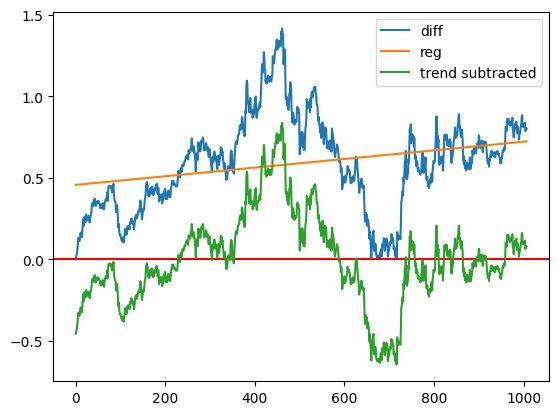

ADF test: p-val= 0.1810102723405036 -> Conclusion: likely non-stationary
----------------------------------------------------------------
KPSS test: p-val= 0.01 -> Conclusion: likely not trend stationary


In [4]:
diff = abs(stock1_data["Adj Close"] - stock2_data["Adj Close"]) #FIX: add ABS() for absolute value

time = np.arange(len(diff))
reg = linregress(time,diff)
line = reg.intercept + reg.slope*time
new_series = diff - line

plt.plot(time,diff, label = "diff")
plt.plot(time,line, label = "reg")
plt.axhline(0, color='red')
plt.plot(time, new_series, label = "trend subtracted")
plt.legend()
plt.show()

check_stationarity(diff,0.05)

#The resulting time series is not stationary => the stocks are not cointegrated
#Maybe they are cointegrated in a different proportion, e.g. short 1.5 AAPL to long 1 MSFT

# Time Series Differencing

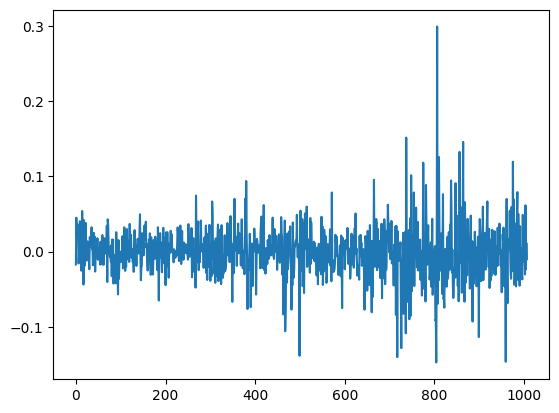

ADF test: p-val= 0.0 -> Conclusion: likely stationary
----------------------------------------------------------------
KPSS test: p-val= 0.1 -> Conclusion: likely trend stationary


In [5]:
diff = np.diff(np.log(stock1_data["Adj Close"]) - np.log(stock2_data["Adj Close"])) 

time = np.arange(len(diff))
plt.plot(time,diff, label = "diff")
plt.show()

check_stationarity(diff,0.05)